# L'Intelligence Artificielle à partir d'un exemple d'application sur smartphone.

<div class="alert alert-block alert-info">
    
Ce document est un NOTEBOOK JUPYTER. Il est constitué de cellules qui contiennent:
* soit du texte formaté, comme la cellule que vous lisez actuellement.
* soit du code python.

Ces cellules sont executables et éditables.
* Pour éditer une cellule de texte, double clic dessus. Pour l'exécuter MAJ + ENTREE du clavier (met en forme le texte).
* Les cellules de code sont toujours en mode édition; MAJ + ENTREE permet d'éxecuter le code PYTHON.

* Si la réponse demandée est du texte, éditez la cellule prévue pour la réponse et écrivez votre réponse.
* Si la réponse demandée est du code, remplacez le texte **#votre code** par votre code.
</div>

# L'application Pl@ntNet

Nous allons commencer à partir d'un exemple d'utilisation de l'Intelligence Artificielle dans une application très utilisée actuellement : ![PlantNet](plantnet.png)

Cette application permet la reconnaisance d'espèces et de variétés végétales à partir de photos. Le rôle de l'Intelligence Artificielle dans cette application est de "deviner" l'espèce végétale sur une photo. Elle s'appuie sur une base de données de photos identifiées lui servant de modèle d'apprentissage.

Un traitement préalable de la photo est necessaire afin de faire ressortir du cliché des "éléments fondamentaux". On peut effectivement supposer que les notions de forme, de couleur, de taille peuvent être (parmi beaucoup d'autres) des éléments essentiels de la reconnaissance d'une plante.

Les algorithmes mis en œuvre sont issus des recherches en analyse et en gestion de données visuelles. Chaque image de la base de données est représentée par un certain nombre d’attributs visuels qui permettent de distinguer une espèce d’une autre. Afin de sélectionner les attributs les plus discriminants, ceux-ci sont appris par des techniques d’intelligence artificielle appelées réseaux de neurones convolutionnels.  Ils peuvent caractériser aussi bien des traits assez généraux comme la couleur de la fleur ou la forme générale de la feuille, que des détails subtils comme la forme de la pointe des pétales de la fleur ou la présence d’une légère pilosité sur la marge des feuilles.

Le premier objectif de l'activité suivante va être d'essayer de comprendre comment fonctionne cette reconnaissance et cet apprentissage machine à partir d'un exemple concret d'alogorithme : l'algorithme des k plus proches voisins qui est un algorithme simple d'apprentissage machine (machine learning), assez efficace en ce qui concerne la reconnaissance de formes.

<div class="alert alert-block alert-info">
    
L’algorithme des k plus proches voisins est un des plus anciens mais aussi un des plus efficaces de l’intelligence artificielle, plus précisément de l’apprentissage automatique.
</div>

## Principe de l'algorithme des k plus proches voisins.

On utilise pour commencer un ensemble d'apprentissage. On va partir du principe que nous avons un jeu de données contenant deux groupes : un groupe avec l'étiquette bleue, l'autre groupe avec l'étiquette rouge. Ces deux groupes ont chacun des caractéristiques (descripteurs) qui les placent soit dans les bleus soit dans les rouges. Une représentation graphique de ces deux groupes donnerait ainsi quelque chose comme ça :

![jeu-apprentissage](jeu-app.png)

Pour un ensemble de données étiquetées $ D = \{(x_1,e_1),...,(x_n,e_n)\} $, les coordonnées $ x_i $ s'appellent des __*descripteurs*__ et l'élément $ e_i $ s'appelle l'__*étiquette*__ ou le __*label*__.

L'**objectif** est de, à partir de cet ensemble d’apprentissage, déterminer une règle permettant de prédire l’étiquette de nouveaux points, dont on connaît seulement les __*descripteurs*__(coordonnées) mais pas l’__*étiquette*__.

![jeu-apprentissage](app1.png)

Le **principe** des **k plus proches voisins** est de considérer que l'étiquette du nouveau point sera l'étiquette majoritaire de ses k plus proches voisins.

![jeu-apprentissage](app2.png)![jeu-apprentissage](app3.png)

***On voit très bien que la prédiction de l'étiquette du point à deviner dépend donc de `k`.***

# Mise en application pratique.

Nous allons travailler en python sur une source de données regroupées dans un fichier csv. Ce fichier est nommé `iris.data`et est un jeu de données appelé [Iris de Fisher](https://fr.wikipedia.org/wiki/Iris_de_Fisher).

Le jeu de données comprend 50 échantillons de chacune des trois espèces d'iris (*Iris setosa*, *Iris virginica* et *Iris versicolor*).  Quatre caractéristiques ont été mesurées à partir de chaque échantillon : la longueur et la largeur des sépales et des pétales, en centimètres.

Les données dans le fichier csv sont dans cet ordre :  
longueur sépale, largeur sépale, longueur pétale, largeur pétale, nom espèce.

Afin de simplifier les choses, **nous ne prendrons que deux descripteurs pour deux espèces** : ***la longueur et la largeur des pétales pour Iris Versicolor et Iris Virginica***.

Dans les activité qui suivent, les fonctions vous sont données et expliquées. **L'objectif est de les utiliser correctement pour arriver à vos fins à chaque étape**.

Pour les plus curieux, les fonctions sont documentées, mais il n'est pas necessaire de comprendre le code pour réaliser cette activité.

<div class="alert alert-block alert-danger">

# Il ne vous est donc pas demandé d'écrire des programmes en python mais simplement d'executer des fonctions python et d'analyser les résultats obtenus.
</div>

# 1- Ouvrir un fichier csv et mettre les données dans un tableau
Cette première fonction va permettre :
* d'ouvrir le fichier csv contenant les données sur Iris
* de sélectionner uniquement les données de longueur et largeur des pétales
* de selectionner uniquement *Iris virginica* et *Iris versicolor*
* de mettre les données selectionnées dans une liste exploitable.

<div class="alert alert-block alert-info">
    
Cette fonction necessite deux arguments :  
* `nomFichier` qui est le `"nom du fichier csv"` (fichier qui doit être placé dans le même dossier que ce notebook).
* `affiche` qui prendra la valeur `"O"` ou `"N"` pour l'affichage des données après traitement (`"O"`) ou non (`"N"`)
</div

<div class="alert alert-block alert-info">

On appelle cette fonction ainsi : `Data = lectureCSViris("nomfichiercsv","O")` pour afficher les données ou `Data = lectureCSViris("nomfichiercsv","N")` pour ne pas les afficher. Dans tous les cas vous recupérerez vos données traitées dans la variable `Data`.
</div>

In [1]:
################################################################
# EXECUTEZ SIMPLEMENT CETTE CELLULE POUR MEMORISER LA FONCTION #
################################################################

import csv # importation de la bibliothèque qui permet de lire les fichiers csv
from math import sqrt # importation sqrt (racine carrée) de la bibliothèque math

def lectureCSViris(nomFichier,affiche):
    ''' lectureCSViris(nomFichier,affiche) attend deux arguments : le "nom du fichier" à ouvrir
    suivi de "O" pour afficher les donneés traitées ou de "N" pour ne pas les afficher.
    Elle retourne les données traitées dans une liste.'''
    fichierCSV = open(nomFichier,"r")             # On ouvre le fichier csv
    lignes = csv.reader(fichierCSV)               # On lit les données du fichier
    liste = list(lignes)                          # On met ces données sous forme de liste
    data = []                                     # On crée une liste vide pour recevoir nos données
    for i in range(len(liste)):                   # Boucle qui va parcourir toute la liste
        if liste[i][4] != 'Iris-setosa':          # On ne prend pas les données Iris-setosa, que les autres
            tempdata = []                         # On crée une liste temporaire
            for j in range (2,len(liste[i])):     # On parcourt les éléments de la liste pétale et etiquette
                tempdata.append(liste[i][j])      # On les ajoute dans la liste temporaire
            data.append(tempdata)                 # On ajoute cette liste temporaire terminée à la liste des données
    for i in range(len(data)):
        for j in range(len(data[i])-1):
            data[i][j] = float(data[i][j])        # Ici on converti les données string en flottant
        if affiche == "O":                        # Cette partie permet l'affichage si demandé
            print(data[i])
    return data                                   # Retourne la liste de données

<div class="alert alert-block alert-danger">

***QUESTION 1*** : Le fichier csv contenant les données iris s'appelle `iris.data`. Appellez la fonction lectureCSViris() dans la cellule ci dessous afin d'obtenir dans la variable `Data` les longueurs et largeurs des pétales pour *Iris Versicolor* et *Iris Virginica*. Vous pouvez afficher le résultat pour vérifier.
</div>

In [2]:
#########################################################################################################
# ENTREZ ICI L'APPEL DE LA FONCTION lectureCSViris(). Les données seront stockées dans la variable Data #
#########################################################################################################

#votre code
Data = lectureCSViris("iris.data","O")

[4.7, 1.4, 'Iris-versicolor']
[4.5, 1.5, 'Iris-versicolor']
[4.9, 1.5, 'Iris-versicolor']
[4.0, 1.3, 'Iris-versicolor']
[4.6, 1.5, 'Iris-versicolor']
[4.5, 1.3, 'Iris-versicolor']
[4.7, 1.6, 'Iris-versicolor']
[3.3, 1.0, 'Iris-versicolor']
[4.6, 1.3, 'Iris-versicolor']
[3.9, 1.4, 'Iris-versicolor']
[3.5, 1.0, 'Iris-versicolor']
[4.2, 1.5, 'Iris-versicolor']
[4.0, 1.0, 'Iris-versicolor']
[4.7, 1.4, 'Iris-versicolor']
[3.6, 1.3, 'Iris-versicolor']
[4.4, 1.4, 'Iris-versicolor']
[4.5, 1.5, 'Iris-versicolor']
[4.1, 1.0, 'Iris-versicolor']
[4.5, 1.5, 'Iris-versicolor']
[3.9, 1.1, 'Iris-versicolor']
[4.8, 1.8, 'Iris-versicolor']
[4.0, 1.3, 'Iris-versicolor']
[4.9, 1.5, 'Iris-versicolor']
[4.7, 1.2, 'Iris-versicolor']
[4.3, 1.3, 'Iris-versicolor']
[4.4, 1.4, 'Iris-versicolor']
[4.8, 1.4, 'Iris-versicolor']
[5.0, 1.7, 'Iris-versicolor']
[4.5, 1.5, 'Iris-versicolor']
[3.5, 1.0, 'Iris-versicolor']
[3.8, 1.1, 'Iris-versicolor']
[3.7, 1.0, 'Iris-versicolor']
[3.9, 1.2, 'Iris-versicolor']
[5.1, 1.6,

<div class="alert alert-success">

A partir de maintenant :
* la variable `Data` contient vos 100 données sur longueur et largeur des pétales de *Iris versicolor* et *Iris virginica*.
</div>

# 2- Réaliser un affichage graphique des données

Nous allons utliser la bibliothèque matplotlib pour afficher graphiquement nos points. Cette bibliothèque n'étant pas intégrée à python, il faudra peut être exéccuter la cellule suivante pour l'installer:

In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\python37\python.exe -m pip install --upgrade pip' command.


<div class="alert alert-block alert-info">

La fonction suivante affiche **pour une liste déjà traité avec lectureCSViris()**, un affichage graphique des données...
Elle demande en argument uniquement le fichier de données.
</div>

In [4]:
################################################################
# EXECUTEZ SIMPLEMENT CETTE CELLULE POUR MEMORISER LA FONCTION #
################################################################

import matplotlib.pyplot as plt # importation de la bibliothèque qui permet la représentation graphique

def affichageGraph(donnees):
    ''' Cette fonction affiche sous forme graphique un jeu de données déjà traité par la fonction 
    lectureCSViris()'''
    versicolorX,versicolorY,virginicaX,virginicaY = [],[],[],[] # On crée 4 listes de coordonées
    for i in range(len(donnees)):                               # Boucle qui crée les listes de coordonnées
        if donnees[i][2] == 'Iris-versicolor':
            versicolorX.append(donnees[i][0])
            versicolorY.append(donnees[i][1])
        else:
            virginicaX.append(donnees[i][0])
            virginicaY.append(donnees[i][1])
    plt.plot(versicolorX, versicolorY, 'bo', label = 'iris-versicolor')      # On place les points des listes
    plt.plot(virginicaX, virginicaY, 'r+', label = 'iris-virginica')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) # On définit les légendes
    plt.xlabel('longueur pétales')
    plt.ylabel('largeur pétales')
    plt.show()                                                               # On affiche le graphique

<div class="alert alert-block alert-danger">

***QUESTION 2*** : Appellez la fonction affichageGraph() dans la cellule ci dessous afin d'obtenir une représentation graphique des longueurs et largeurs des pétales pour *Iris Versicolor* et *Iris Virginica*.
</div>

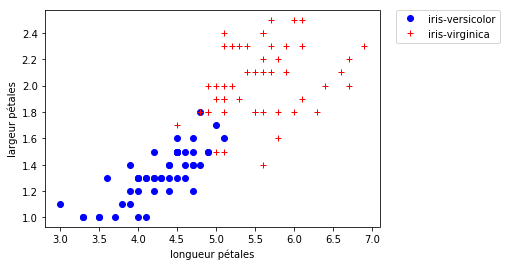

In [5]:
############################################################################################################
# ENTREZ ICI L'APPEL DE LA FONCTION affichageGraph() avec la variable Data obtenu précedement en argument. #
############################################################################################################

#votre code
affichageGraph(Data)

# 3- Les principes de l'apprentissage machine : un ensemble d'entrainement et un ensemble de test

Pour apprendre, notre machine va devoir disposer d'un **ensemble d'apprentissage** et d'un **ensemble de test**. On va utiliser notre ensemble de données iris.data que l'on va découper en deux : un certain pourcentage `p` de cet ensemble servira d'ensemble d'**apprentissage** et le reste servira d'ensemble de **test** à notre machine.

La machine va donc s'entrainer sur l'ensemble d'apprentissage (que l'on nommera `entrainement`) et testera son apprentissage sur l'ensemble de test (que l'on nommera `test`), l'objectif étant d'avoir le moins d'erreurs possibles de prédiction sur l'ensemble de test.

<div class="alert alert-block alert-info">
    
Dans un premier temps nous allons prendre chaque point de notre jeu d'apprentissage et faire une prediction en se basant sur les k plus proches voisins de ce jeu. Nous ferons varier k afin de determiner le meilleur (celui avec lequel il y a le moins d'erreurs).
Nous appliquereons ensuite notre meilleur k sur l'ensemble de test : chaque point de l'ensemble de test sera considéré comme étiquette inconnue, nous le placerons parmi nos points de l'ensemble d'entrainement, l'alogorithme des k plus proches voisins nous donnera une prédiction d'étiquette et nous comptabliserons les erreurs de prédiction.
</div>

# 4- Création de notre ensemble d'apprentissage et de test à partir de notre ensemble de données Data.

<div class="alert alert-block alert-info">
    
La fonction `creationJeuDeDonnees(p,data)` suivante permet de créer un jeu de test de `p` pourcents de l'ensemble de données `data`. Elle renvoie donc deux valeurs, la première étant les données qui serviront au jeu d'entrainement et la deuxième au jeu de test.

Le jeu de test sera de 30% des données, le jeu d'entrainement de 70% des données.
</div>

In [6]:
################################################################
# EXECUTEZ SIMPLEMENT CETTE CELLULE POUR MEMORISER LA FONCTION #
################################################################

from random import shuffle

def creationJeuxDeDonnees(p,dataset):
    ''' Cette fonction crée un jeu de données de test de p pourcents de l'ensemble de données dataset
    et le reste étant un jeu de données d\entrainement'''
    listeIndices = [i for i in range(len(dataset))] # On crée une liste des indices de nos données (1,2,3,4...n)
    shuffle(listeIndices) # On mélange aléatoirement cette liste d'indices
    testI = listeIndices[0:int(p/100*len(dataset))] # et on on prend les p pourcents premiers pour le test
    entrainementI = listeIndices[int(p/100*len(dataset)):len(dataset)] # et le reste pour l'entrainement
    test = [dataset[i] for i in testI] # On crée notre liste test à partir des indices
    entrainement = [dataset[i] for i in entrainementI] # On crée notre liste entrainement à partir des indices
    return entrainement,test # Ainsi on obtient deux jeux différents à chaque fois que l'on uilise cette fonction.

In [7]:
#################################################################################
# LANCEZ CETTE LIGNE DE COMMANDE POUR CREER VOTRE JEU DE TEST ET D'ENTRAINEMENT #
#################################################################################

Entrainement, Test = creationJeuxDeDonnees(30,Data)
print(Entrainement)
print(Test)

[[4.8, 1.8, 'Iris-virginica'], [3.3, 1.0, 'Iris-versicolor'], [5.0, 1.7, 'Iris-versicolor'], [6.4, 2.0, 'Iris-virginica'], [4.4, 1.2, 'Iris-versicolor'], [5.7, 2.1, 'Iris-virginica'], [4.8, 1.4, 'Iris-versicolor'], [6.0, 2.5, 'Iris-virginica'], [5.6, 2.4, 'Iris-virginica'], [4.9, 1.5, 'Iris-versicolor'], [6.9, 2.3, 'Iris-virginica'], [4.4, 1.4, 'Iris-versicolor'], [4.2, 1.2, 'Iris-versicolor'], [4.6, 1.4, 'Iris-versicolor'], [5.1, 1.9, 'Iris-virginica'], [3.9, 1.4, 'Iris-versicolor'], [4.9, 1.8, 'Iris-virginica'], [4.6, 1.3, 'Iris-versicolor'], [4.5, 1.3, 'Iris-versicolor'], [4.9, 2.0, 'Iris-virginica'], [5.2, 2.0, 'Iris-virginica'], [6.1, 1.9, 'Iris-virginica'], [6.1, 2.3, 'Iris-virginica'], [5.2, 2.3, 'Iris-virginica'], [5.6, 2.2, 'Iris-virginica'], [3.7, 1.0, 'Iris-versicolor'], [5.6, 2.1, 'Iris-virginica'], [4.0, 1.0, 'Iris-versicolor'], [5.5, 1.8, 'Iris-virginica'], [4.2, 1.3, 'Iris-versicolor'], [5.8, 1.6, 'Iris-virginica'], [4.3, 1.3, 'Iris-versicolor'], [3.6, 1.3, 'Iris-versico

<div class="alert alert-success">

A partir de maintenant :
* la variable `Entrainement` contient vos 70 données du jeu d'entrainement.
* la variable `Test` contient vos 20 données du jeu de test.
</div>

<div class="alert alert-block alert-danger">

***QUESTION 3*** : Faites une représentation graphique des ces deux jeux à l'aide de la fonction affichageGraph() dans la cellule suivante :
</div>

Affichage du jeu d'entrainement :


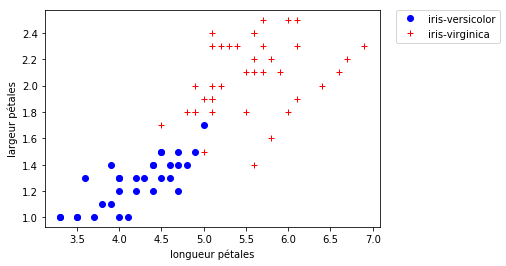

Affichage du jeu de test :


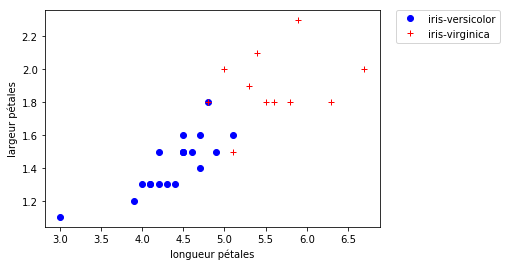

In [8]:
###############################################################################################
# ENTREZ ICI LES APPELS DE LA FONCTION affichageGraph() AVEC LES BONNES VARIABLES EN ARGUMENT #
# AFIN D'AFFICHER GRAPHIIQUEMENT NOS DEUX JEUX DE TEST ET D'ENTRAINEMENT.                     #
###############################################################################################

print("Affichage du jeu d'entrainement :")
#votre code
affichageGraph(Entrainement)

print("Affichage du jeu de test :")
#votre code
affichageGraph(Test)

# 5- Calcul de la distance entre deux points.

Afin de déterminer les voisins proches, il est nécessaire de calculer la distance entre deux points. On va utiliser la distance euclidienne : la distance entre deux points `x=[x_1,...,x_n]` et `y=[y_1,...,y_n]` est 

$$
d(x,y) = \sqrt{\sum_{i=1}^n (x_i-y_i)^2}
$$

<div class="alert alert-block alert-info">
    
La fonction `distance(data,i1,i2)` suivante permet de calculer la distance entre deux points situés aux indices `i1` et `i2` d'un ensemble de données `data`.
</div>

In [9]:
################################################################
# EXECUTEZ SIMPLEMENT CETTE CELLULE POUR MEMORISER LA FONCTION #
################################################################

def distance(data,i1,i2):
    ''' calcule la distance euclidienne entre deux points de la liste du jeu de données data
    positionnés aux indices i1 et i2 de la liste data'''
    if len(data[i1]) != len(data[i2]):
        return "Erreur : les deux points n'ont pas le même nombre de descripteurs."
    somme = 0
    for i in range(len(data[i1])-1):
        somme += (data[i1][i]-data[i2][i]) * (data[i1][i]-data[i2][i])
    return sqrt(somme)

<div class="alert alert-block alert-danger">

***QUESTION 4*** : Faites un test de cette fonction sur votre ensemble d'entrainement à l'aide de la cellule suivante. Vous pouvez essayer avec plusieurs indices entre 0 et 69 (votre ensemble d'entrainement contient 70 valeurs, de l'indice 0 à l'indice 69).
</div>

In [10]:
#######################################################################################################
# LANCEZ CETTE LIGNE DE COMMANDE POUR CALCULER LA DISTANCE ENTRE LES POINTS SITUES AUX INDICES 0 et 1 #
# DE VOTRE ENSEMBLE D'ENTRAINEMENT (CE SONT LES DEUX PREMIERS POINTS DU JEU D'ENTRAINEMENT)           #
# PUIS ENSUITE EN FAISANT VARIER LES INDICES                                                          #
#######################################################################################################

distance(Entrainement,0,1)

1.7

# 6- Determination des k plus proches voisins d'un point.

On peut maintenant avoir une fonction qui va nous permettre de déterminer les k plus proches voisins d'un point dans un jeu de données.

<div class="alert alert-info">

C'est ce que fait la fonction suivante `leskPlusProchesVoisins(x, k, data)` qui attend en argument `x` l'indice du point du jeu de données dont veut determiner les k plus proches voisins, `k` la valeur de k, `data` le jeu de données d'entrainement ou de test sur lequel on trouve les k plus proches voisins.
</div>

In [11]:
################################################################
# EXECUTEZ SIMPLEMENT CETTE CELLULE POUR MEMORISER LA FONCTION #
################################################################

def leskPlusProchesVoisins(x, k, data):
    ''' leskPlusProchesVoisins(x, k, data) recherche les k plus proches voisins
    du point à l'indice x de la liste du jeu de données data'''
    listeDesDistances = []
    for indice in range(len(data)): # On parcourt la liste des indices de data
        listeDesDistances.append(distance(data, x, indice)) # On alimente la liste des distances
    Kppv = [] # On crée une liste vide des k plus proches voisins
    for i in range(k): # On boucle k fois
        d= float("inf") # d prend une valeur infiniment grande pour commencer
        for j in range(len(listeDesDistances)): # On parcourt tous les indices de la liste des distances
            if listeDesDistances[j]<d and j != x and data[j] not in Kppv: # on teste la valeur<d et pas la donnée testée et pas déjà dans Kppv
                d = listeDesDistances[j] # d prend alors cette valeur car c'est la plus petite découverte
                donneeLaPlusProche = data[j] # donneeLaPlusProche prend la valeur de la donnée à l'indice de cette valeur
        Kppv.append(donneeLaPlusProche) # Enfin on alimente les Kppv
    return Kppv

<div class="alert alert-block alert-danger">

***QUESTION 5*** : Faites varier indice (min 0 et max 69) et k (min 1 et max 69) afin d'observer le résultat obtenu à l'aide de la fonction leskPlusProchesVoisins().
</div>

In [23]:
###########################################################################################################
# LANCEZ CES LIGNES DE COMMANDES POUR TROUVER LES k PLUS PROCHES VOISINS DU POINT SITUE A L'INDICE indice #
# DE VOTRE ENSEMBLE D'ENTRAINEMENT. FAITES VARIER indice ET k                                             #
###########################################################################################################
indice = 1
k = 3
data = Entrainement

print("Je cherche les k="+str(k)+" plus proches voisins de "+str(Entrainement[indice]))
print(leskPlusProchesVoisins(indice,k,Entrainement))

Je cherche les k=3 plus proches voisins de [4.1, 1.3, 'Iris-versicolor']
[[4.1, 1.3, 'Iris-versicolor'], [4.0, 1.3, 'Iris-versicolor'], [4.2, 1.3, 'Iris-versicolor']]


<div class="alert alert-block alert-danger">

***QUESTION 6*** : Proposez pour 3 cas de indice et k différents une prédiction de l'étiquette du
    point testé en expliquant comment vous avez fait cette prédiction avec les k plus proches voisins.
    Précisez si votre prédiction est bonne.
</div>

**VOTRE REPONSE ICI :**  
Dans chaque cas (indice = 1 / k=3 - indice=12 / k=5 - indice=7 / k=7) j'ai prédit l'étiquette en choisissant celle majoritaire parmis les k plus proches voisins obtenus. Ma prédiction a toujours été bonne...

# 7- Determiner l'étiquette d'une donnée par prediction à partir des k plus proches voisins

<div class="alert alert-info">
    
Cette fonction `prediction(x, k, data)` permet de prédire l'étiquette de la donnée d'indice `x` du jeu de données `data` après calcul des `k` plus proches voisins dans le jeu de données `data` basé sur le plus grand nombre d'étiquettes obtenu.
Elle retourne la prédiction de l'étiquette à partir des k plus proches voisins et 0 s'il n'y a pas d'erreur de prédiction ou 1 s'il y a erreur.
</div>

In [13]:
################################################################
# EXECUTEZ SIMPLEMENT CETTE CELLULE POUR MEMORISER LA FONCTION #
################################################################

def prediction(x, k, data):
    decomptes = {}
    erreur = 0
    listeVoisins = leskPlusProchesVoisins(x,k,data)
    for v in listeVoisins:
        etiquette = v[len(v)-1]
        if etiquette in decomptes:
            decomptes[etiquette] += 1
        else:
            decomptes[etiquette]=1
    listeTriee=sorted(decomptes.items(), key=lambda t:t[1], reverse=True)
    if listeTriee[0][0] != data[x][len(data[x])-1]:
        erreur = 1
    return listeTriee[0][0],erreur

<div class="alert alert-block alert-danger">

***QUESTION 7*** : Effectuez une prédiction de l'étiquette d'un point situé à l'indice
`indice` de votre jeu d'entrainement en choisissant une valeur à `k` que vous ferez varier.
Utilisez votre affichage graphique de la question 3 pour tester un point qui génèrera une erreur
de prédiction.
</div>

In [14]:
#########################################################################################
# LANCEZ CES LIGNES DE COMMANDES POUR EFFECTUER UNE PREDICTION DE L'ETIQUETTE DU POINT  #
# SITUE A L'INDICE indice DE VOTRE ENSEMBLE D'ENTRAINEMENT. FAITES VARIER indice ET k   #
# VOUS POUVEZ UTILISER VOTRE AFFICHAGE GRAPHIQUE DE LA QUESTION 3 POUR TROUVER UN POINT #
# AVEC UN RISQUE D'ERREUR A TESTER ICI SUR VOTRE JEU D'ENTRAINEMENT                     #
#########################################################################################
indice = 1
k = 3
data = Entrainement

Prediction, Erreur = prediction(indice,k,data)
print("Point testé : " + str(Entrainement[indice])+"\nétiquette prédite : "+str(Prediction)+"\nNuméro d'erreur : "+str(Erreur))

Point testé : [4.4, 1.2, 'Iris-versicolor']
étiquette prédite : Iris-versicolor
Numéro d'erreur : 0


# 8- Trouvons le meilleur k

Nous allons maintenant tester pour un jeu de données `data` contenant n données tous les `k` allant de 1 à n/2 en testant pour chaque cas le nombre d'erreurs.

<div class="alert alert-info">
    
Cette fonction `meilleurK(data, affiche)` affiche un résultat graphique si affiche a la valeur `"O"` à partir d'un jeu de données `data`.

In [15]:
################################################################
# EXECUTEZ SIMPLEMENT CETTE CELLULE POUR MEMORISER LA FONCTION #
################################################################

def meilleurK(data,affiche):
    nbEltData = len(data)
    maxErreurs = nbEltData
    E, K = [], []
    for k in range(1,int(nbEltData/2)):
        nombreErreurs=0
        for indice in range(len(data)):
            x,y = prediction(indice, k, data)
            if y == 1:
                nombreErreurs += 1
        E.append(nombreErreurs)
        K.append(k)
        if maxErreurs > nombreErreurs:
            maxErreurs = nombreErreurs
            meilleurk = k
    if affiche == "O":
        plt.plot(K, E, '-', label = 'Nombre d\'erreurs')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
        plt.xlabel('k')
        plt.ylabel('erreurs')
        plt.show()
        print ("Meilleur k: ", meilleurk, " taux d'erreur : ", float((maxErreurs)/len(data)))
    return meilleurk

<div class="alert alert-block alert-danger">

***QUESTION 8*** : Utilisez la fonction suivante pour visualiser le meilleur k de votre
jeu d'entrainement.
</div>

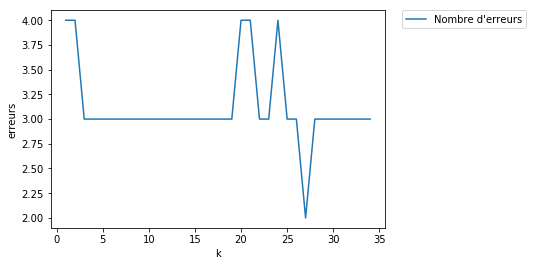

Meilleur k:  27  taux d'erreur :  0.02857142857142857


27

In [16]:
####################################################################################
# LANCEZ CETTE FONCTION POUR TROUVER NOTRE MEILLEUR k SUR NOTRE JEU D'ENTRAINEMENT #
####################################################################################

meilleurK(Entrainement,"O")

# 9- Calculer le taux d'erreur de données de test pour un k donné sur un jeu d'entrainement

<div class="alert alert-info">
    
Cette fonction `tauxErreur(k,testData,trainData)` va calculer le taux d'erreur de prediction des étiquettes de tous les points de `testData` en utilisant `k` sur le jeu d'entrainement `trainData`.
</div>

In [17]:
################################################################
# EXECUTEZ SIMPLEMENT CETTE CELLULE POUR MEMORISER LA FONCTION #
################################################################

def tauxErreur(k,trainData,testData):
    maxErreurs = len(testData)
    nombreErreurs = 0
    for indice in range (len(testData)):
        tempDatas = []
        tempDatas = [i for i in trainData]
        tempDatas.append(testData[indice])
        x,y = prediction(len(tempDatas)-1, k, tempDatas)
        if y == 1:
            nombreErreurs += 1
    print ("Taux d'erreur : ", float((nombreErreurs)/len(testData)))

<div class="alert alert-block alert-danger">

***QUESTION 9*** : Testez la fonction tauxErreur() suivante. Le taux d'erreur obtenu avec le jeu de test est il cohérent ?
</div>

In [18]:
###################################################################################
# LANCEZ CETTE FONCTION AVEC VOTRE MEILLEUR k SUR NOTRE JEU D'ENTRAINEMENT        #
# AVEC LES DONNEES DE TEST AFIN D'ESTIMER S'IL Y A UNE COHERENCE DE TAUX D'ERREUR #
###################################################################################

tauxErreur(5,Entrainement,Test)

Taux d'erreur :  0.1


**VOTRE REPONSE ICI :**  
Parfois il y a une cohérence et parfois non car le jeu de test affiche un taux d'erreur supérieur à celui obtenu au cours de l'apprentissage... Les deux réponses sont possible....

# 10- Mise en route de notre Intelligence Artificielle.

Nous avons tout ce qu'il nous faut pour mettre en route notre Intelligence Artificielle.
La fonction suivante IA() permettra, à partir d'un fichier iris.data :
* de traiter le fichier iris.data pour ne conserver que les dimensions des pétales de iris virginica et iris versicilor.
* de créer un jeu de test `test` et un jeu d'appentissage `entrainement` et les afficher en liste et graphiquement.
* d'évaluer l'évolution du taux d'erreur en fonction de `k` sur le jeu d'entrainement et d'afficher le résultat graphiquement...
* de tester notre meilleur k sur le jeu de test


Voici notre jeu d'entrainement et sa représentation graphique
 [[5.4, 2.3, 'Iris-virginica'], [4.1, 1.3, 'Iris-versicolor'], [5.6, 2.4, 'Iris-virginica'], [5.8, 1.8, 'Iris-virginica'], [4.7, 1.5, 'Iris-versicolor'], [4.1, 1.3, 'Iris-versicolor'], [5.5, 1.8, 'Iris-virginica'], [6.1, 2.5, 'Iris-virginica'], [5.7, 2.1, 'Iris-virginica'], [5.7, 2.3, 'Iris-virginica'], [5.1, 1.5, 'Iris-virginica'], [5.9, 2.1, 'Iris-virginica'], [4.7, 1.6, 'Iris-versicolor'], [6.1, 2.3, 'Iris-virginica'], [5.6, 1.4, 'Iris-virginica'], [5.6, 2.4, 'Iris-virginica'], [4.9, 1.8, 'Iris-virginica'], [5.1, 2.0, 'Iris-virginica'], [4.5, 1.7, 'Iris-virginica'], [4.0, 1.3, 'Iris-versicolor'], [5.2, 2.3, 'Iris-virginica'], [4.5, 1.5, 'Iris-versicolor'], [3.5, 1.0, 'Iris-versicolor'], [5.8, 1.6, 'Iris-virginica'], [4.0, 1.2, 'Iris-versicolor'], [4.8, 1.8, 'Iris-versicolor'], [5.7, 2.5, 'Iris-virginica'], [4.9, 1.5, 'Iris-versicolor'], [6.0, 2.5, 'Iris-virginica'], [5.1, 1.6, 'Iris-versicolor'], [4.4, 1.3, 'Iris-versicol

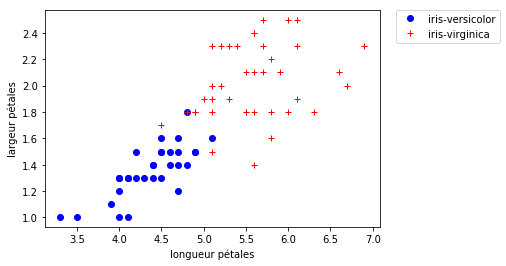

Voici notre jeu de test et sa représentation graphique
 [[4.5, 1.5, 'Iris-versicolor'], [3.7, 1.0, 'Iris-versicolor'], [3.5, 1.0, 'Iris-versicolor'], [5.9, 2.3, 'Iris-virginica'], [3.8, 1.1, 'Iris-versicolor'], [4.3, 1.3, 'Iris-versicolor'], [3.0, 1.1, 'Iris-versicolor'], [3.6, 1.3, 'Iris-versicolor'], [5.0, 1.5, 'Iris-virginica'], [4.7, 1.4, 'Iris-versicolor'], [4.5, 1.5, 'Iris-versicolor'], [5.1, 2.4, 'Iris-virginica'], [4.6, 1.3, 'Iris-versicolor'], [4.5, 1.5, 'Iris-versicolor'], [6.4, 2.0, 'Iris-virginica'], [4.9, 2.0, 'Iris-virginica'], [4.2, 1.3, 'Iris-versicolor'], [6.7, 2.2, 'Iris-virginica'], [3.9, 1.4, 'Iris-versicolor'], [4.2, 1.2, 'Iris-versicolor'], [4.8, 1.8, 'Iris-virginica'], [4.0, 1.3, 'Iris-versicolor'], [5.1, 1.9, 'Iris-virginica'], [5.0, 1.7, 'Iris-versicolor'], [5.6, 2.2, 'Iris-virginica'], [5.4, 2.1, 'Iris-virginica'], [4.4, 1.2, 'Iris-versicolor'], [3.9, 1.2, 'Iris-versicolor'], [5.0, 2.0, 'Iris-virginica'], [3.3, 1.0, 'Iris-versicolor']]
Jeu de test:


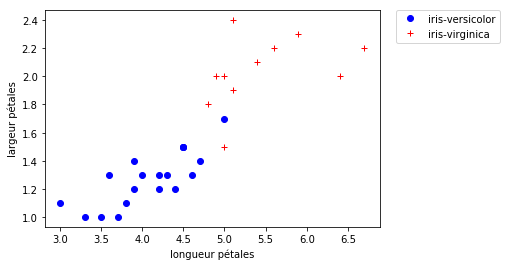

Voici notre meilleur k sur notre jeu d'entrainement :


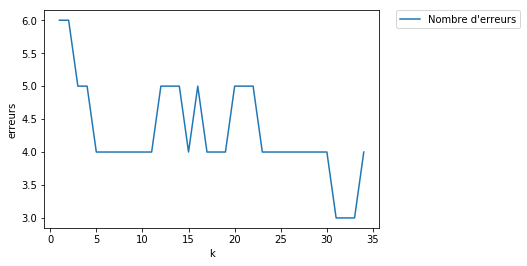

Meilleur k:  31  taux d'erreur :  0.04285714285714286
Voici notre taux d'erreur sur le jeu de test avec le meilleur k obtenu à l'entrainement ( 31 ):
Taux d'erreur :  0.1


In [19]:
####################################################
# LANCEZ CES LIGNES DE CODE POUR EXECUTER VOTRE IA #
####################################################

# On ouvre le fichier iris.data et on ne conserve que les pétales pour cersicolor et virginica
Data = lectureCSViris("iris.data","N")
# On crée nos deux jeux entrainement (70% des données) et test
Entrainement, Test = creationJeuxDeDonnees(30,Data)
# On affiche
print("Voici notre jeu d'entrainement et sa représentation graphique\n",Entrainement)
affichageGraph(Entrainement)
print("Voici notre jeu de test et sa représentation graphique\n",Test)
print("Jeu de test:")
affichageGraph(Test)
# On calcule et on affiche notre meilleur k. On le stocke dans la variable MK
print("Voici notre meilleur k sur notre jeu d'entrainement :")
MK = meilleurK(Entrainement,"O")
# On teste notre jeu de test sur notre jeu d'apprentissage avec notre meilleur k
print("Voici notre taux d'erreur sur le jeu de test avec le meilleur k obtenu à l'entrainement (",MK,"):")
tauxErreur(MK,Entrainement,Test)


<div class="alert alert-block alert-danger">

***QUESTION 10*** : Lancez votre IA 5 fois. Pour chaque execution, notez vos résultats dans ce tableau :
</div>

|Execution|Taux d'erreur ENTRAINEMENT|     Taux d'erreur TEST    |
|---------|--------------------------|---------------------------|
|1        |          0.042           |            0.033          |
|2        |          0.042           |            0.066          |
|3        |          0.014           |            0.1            |
|4        |          0.057           |            0.133          |
|5        |          0.042           |            0.1            |

Remplissez les deux colonnes avec vos taux d'erreur obtenus.

<div class="alert alert-block alert-danger">
    
***QUESTION 11*** : Que constatez vous sur les variations de taux d'erreurs obtenus entre la phase d'apprentissage et la phase de test ?
</div>

**VOTRE REPONSE ICI :**  
Parfois le taux d'erreur au cours du test est supérieur à celui de l'entrainement...

<div class="alert alert-block alert-danger">

***QUESTION 12*** : Dans cet exemple, la prédiction peut donc être biaisée car le taux d'erreur varie. Pouvez vous expliquer pourquoi votre taux d'erreur varie à chaque execution ?
</div>

**VOTRE REPONSE ICI :**  
A chaque éxecution on a un échantillon d'apprentissage et de test qui diffère. Le taux d'erreur varie en fonction de ces échantillons.

<div class="alert alert-block alert-danger">

***QUESTION 13*** : Pensez vous que notre IA serait plus ou mins efficace si on augmentait le nombre de données de son jeu d'apprentissage ?
</div>

**VOTRE REPONSE ICI :**  
D'après les résultats obtenus, notre IA serait plus efficace en lui augmentant son jeu de données d'apprentissage.

<div class="alert alert-info">

Depuis son lancement en 2013, l’application Pl@ntNet développée par le Cirad, l’INRA, l’Inria, et l’IRD a permis d’identifier des dizaines de milliers de plantes photographiées partout dans le monde. Dans le cadre du partenariat avec Tela Botanica, une partie des observations faites via Pl@ntNet sont reversées dans la base Flora Data.  
Si vous êtes inscrit à Tela Botanica, vous retrouverez donc vos photos identifiées par Pl@ntNet sur IdentiPlante, dans votre Carnet en Ligne, voire éventuellement sur eFlore.
![Tela Botanica](telabotanica.png)
source : https://www.tela-botanica.org/2018/10/plantnet-mobile-sur-votre-ordinateur/
</div>

<div class="alert alert-block alert-danger">

***QUESTION 14*** : Qu'est-ce qui, d'après ce que vous avez appris, pourrait BIAISER les résultats de notre application Pl@ntNet ?
</div>

**VOTRE REPONSE ICI :**  
Les photos prises et qui alimentent la base de données de reconnaissance peuvent biaiser le résultat si elles ne sont pas de bonne qualité et qu'elles génèrent une prédiction fausse... chaque photo intégrée dans la base comme étant reconnue doit être validée par des experts...